# EfficientNetB3 with Kaggle data: 10 epochs and 150x150 resolution

For documentation, see [here](https://keras.io/api/applications/efficientnet/#efficientnetb3-function)

An overview of pretrained models can be found at [https://keras.io/api/applications/](https://keras.io/api/applications/)

In [1]:
import pathlib, os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

## 1. Look at data

In [2]:
# get current absolute path of parent folder of this file
path = os.path.dirname(os.path.abspath('3_EfficientNetB3_Kaggle'))

# set paths to train, test and validation folder
train_dir = path + '/data/data_2/train/'
test_dir = path + '/data/data_2/test/'
val_dir = path + '/data/data_2/valid/'

In [3]:
# print the names of the subfolder (i.e. classes) within train folder
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['.DS_Store' 'ABBOTTS BABBLER' 'ABBOTTS BOOBY'
 'ABYSSINIAN GROUND HORNBILL' 'AFRICAN CROWNED CRANE'
 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH' 'AFRICAN OYSTER CATCHER'
 'AFRICAN PIED HORNBILL' 'ALBATROSS' 'ALBERTS TOWHEE'
 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH' 'ALTAMIRA YELLOWTHROAT'
 'AMERICAN AVOCET' 'AMERICAN BITTERN' 'AMERICAN COOT' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN WIGEON' 'AMETHYST WOODSTAR' 'ANDEAN GOOSE'
 'ANDEAN LAPWING' 'ANDEAN SISKIN' 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD'
 'ANTBIRD' 'ANTILLEAN EUPHONIA' 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN'
 'ASHY STORM PETREL' 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS'
 'ASIAN DOLLARD BIRD' 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO'
 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE'
 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BRO

Define a helper function to randomly show one image:

In [4]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Apply the visualization function to one example:

Image shape: (224, 224, 3)


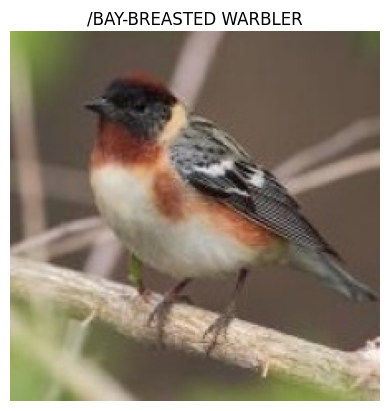

In [5]:
img = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        ) # or we can write nike instead of converse to see converse examples

In [6]:
# get shape of image (width, height, colour channels)
img.shape

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


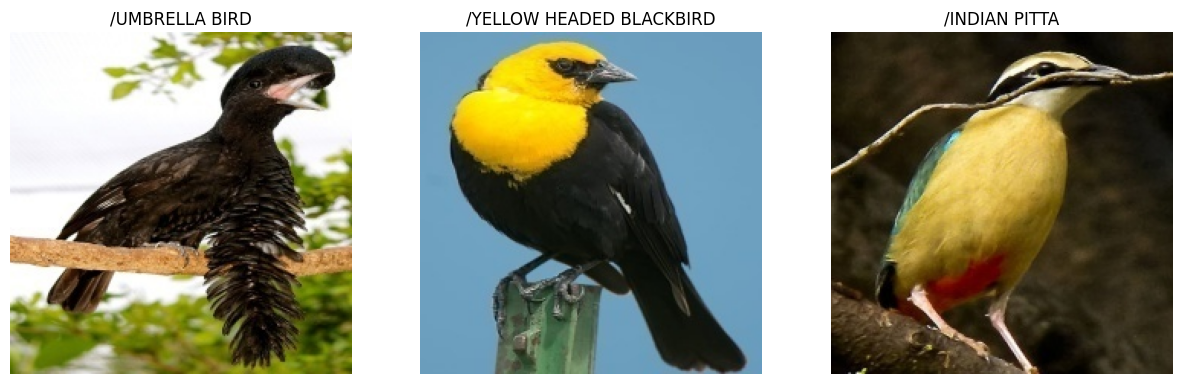

In [7]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image(train_dir, "/UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image(train_dir, "/YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image(train_dir, "/INDIAN PITTA")

## 2. Data Preprocessing

In [8]:
# Normalize images
train_datagen = ImageDataGenerator()#rescale = 1./255)
test_datagen = ImageDataGenerator()#rescale = 1./255)
valid_datagen = ImageDataGenerator()#rescale = 1./255)

# According to documentation on keras rescaling is already part of the model, i.e. input is expected to be in range [0-255]

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [9]:
img_height = 150
img_width = 150
epoch_num = 10

In [10]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(img_height,img_width,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-29 17:22:36.008086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-29 17:22:36.008404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Shape after passing inputs through base model: (None, 4, 4, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)


In [11]:
# 8. Combine the inputs with outputs into a model
model_p150_e10 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_p150_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])


In [12]:
# fit model and measure time
st = time.time()
history = model_p150_e10.fit(train_data,
                                 epochs=epoch_num,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/10


2022-10-29 17:22:47.204802: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-29 17:22:50.905033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 4.3265 - accuracy: 0.7224

2022-10-29 17:53:40.835179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 1869s 843ms/step - loss: 4.3265 - accuracy: 0.7224 - val_loss: 1.5509 - val_accuracy: 0.8952
Epoch 2/10
2208/2208 [==============================] - 1909s 864ms/step - loss: 2.9036 - accuracy: 0.8601 - val_loss: 2.0732 - val_accuracy: 0.9062
Epoch 3/10
2208/2208 [==============================] - 1920s 869ms/step - loss: 2.4965 - accuracy: 0.8917 - val_loss: 2.3889 - val_accuracy: 0.9246
Epoch 4/10
2208/2208 [==============================] - 1909s 864ms/step - loss: 2.1837 - accuracy: 0.9097 - val_loss: 2.4533 - val_accuracy: 0.9062
Epoch 5/10
2208/2208 [==============================] - 1992s 902ms/step - loss: 1.8933 - accuracy: 0.9242 - val_loss: 1.7655 - val_accuracy: 0.9301
Epoch 6/10
2208/2208 [==============================] - 1997s 904ms/step - loss: 1.6551 - accuracy: 0.9341 - val_loss: 1.9486 - val_accuracy: 0.9430
Epoch 7/10
2208/2208 [==============================] - 1984s 899ms/step - loss: 1.5825 - accuracy: 0.9397 - val_loss

Runtime info: One epoch with the EfficientNetB3 takes roughly 32 minutes - total runtime: 320 minutes (~5.5hrs)

In [15]:
model_p150_e10.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, None, None, 1536)  10783535 
                                                                 
 global_average_pooling_laye  (None, 1536)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 450)               691650    
                                                                 
Total params: 11,475,185
Trainable params: 691,650
Non-trainable params: 10,783,535
_________________________________________________________________


In [16]:
model_p150_e10.evaluate(test_data)

71/71 [==============================] - 59s 828ms/step - loss: 1.8060 - accuracy: 0.9507


[1.8060139417648315, 0.9506666660308838]

In [17]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

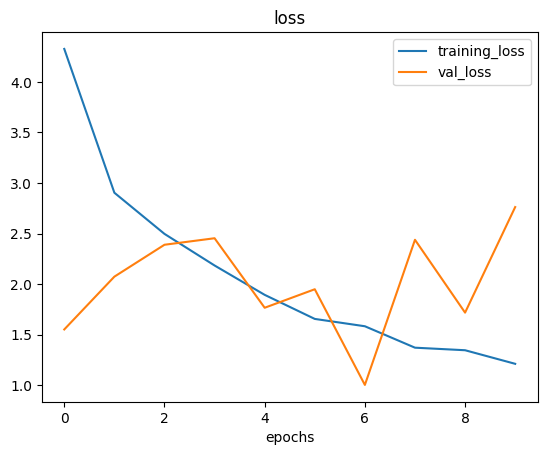

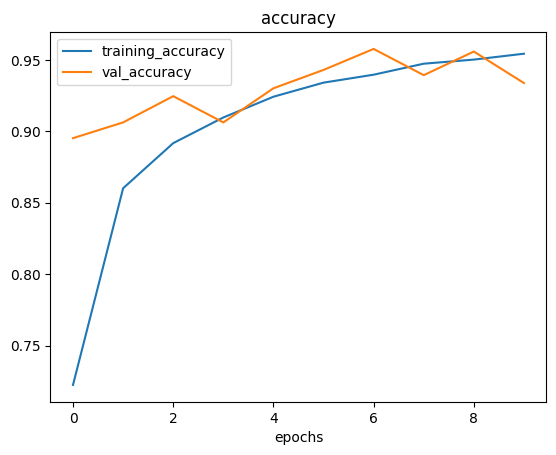

In [18]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [19]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_p150_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [20]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_p150_e10.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_se_ex

In [21]:
# Now we have unfrozen some of the layers on the top 
print(len(model_p150_e10.trainable_variables))

12


In [22]:
# Save the entire small model as a SavedModel.
!mkdir -p saved_model
model_p150_e10.save('saved_model/EfficientNetB3_Kaggle_p150_e10')

2022-10-29 22:57:21.429273: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/EfficientNetB3_Kaggle_p150_e10/assets


INFO:tensorflow:Assets written to: saved_model/EfficientNetB3_Kaggle_p150_e10/assets


## 5. Fine-Tuning and Refitting

In [23]:
fine_tune_epochs = epoch_num + 1

# Refit the model
history_2 = model_p150_e10.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/11


2022-10-29 22:58:04.898649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 2.3282 - accuracy: 0.9082

2022-10-29 23:31:13.501374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 2007s 906ms/step - loss: 2.3282 - accuracy: 0.9082 - val_loss: 1.5971 - val_accuracy: 0.9320
Epoch 11/11
2208/2208 [==============================] - 2003s 907ms/step - loss: 1.2438 - accuracy: 0.9370 - val_loss: 1.1749 - val_accuracy: 0.9412


In [24]:
model_p150_e10.evaluate(test_data)

71/71 [==============================] - 61s 858ms/step - loss: 0.8755 - accuracy: 0.9551


[0.8755351901054382, 0.9551111459732056]

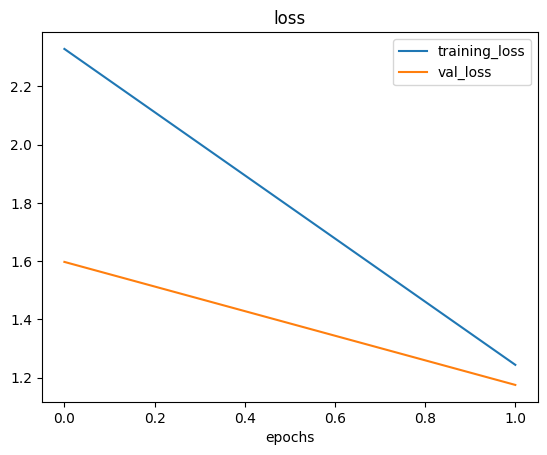

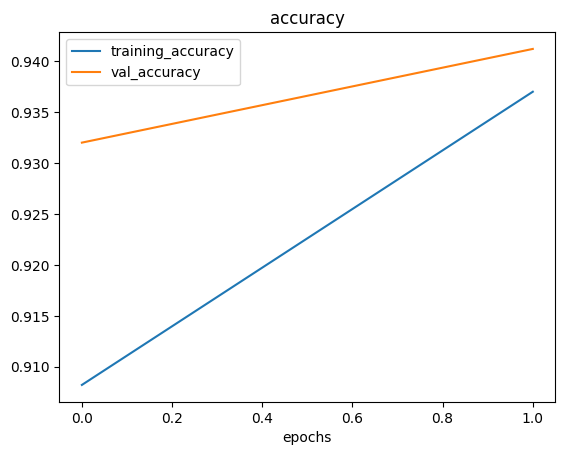

In [25]:
plot_loss_curves(history_2)

## 6. Making some predictions

In [26]:
# cReating a function that preprocess the custom data
def load_and_prep_image(filename, img_shape = img_height):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [27]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Add new files to the test folder 

In [28]:
amsel = path + '/data/data_2/images to test/Amsel.jpeg'
blaumeise = path + '/data/data_2/images to test/blaumeise.jpeg'
buchfink = path + '/data/data_2/images to test/buchfink.jpeg'
elster = path + '/data/data_2/images to test/elster.jpeg'
feldsperling = path + '/data/data_2/images to test/feldsperling.jpeg'
firefinch = path + '/data/data_2/images to test/firefinch.jpg'
gruenfink = path + '/data/data_2/images to test/grünfink.jpeg'
haussperling = path + '/data/data_2/images to test/haussperling.jpeg'
kohlmeise = path + '/data/data_2/images to test/Kohlmeise.jpeg'
mauersegler = path + '/data/data_2/images to test/mauersegler.jpeg'
mehlschwalbe = path + '/data/data_2/images to test/mehlschwalbe.jpeg'
rotkehlchen = path + '/data/data_2/images to test/Rotkehlchen.jpeg'
star = path + '/data/data_2/images to test/Star.jpeg'

2022-10-30 00:06:06.627267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


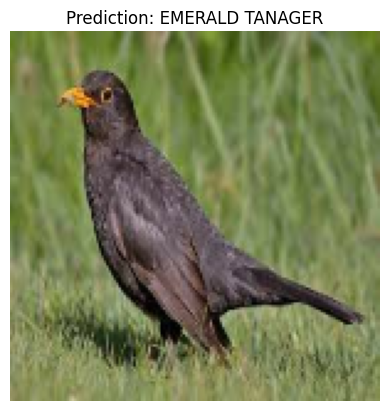

In [29]:
# amsel
pred_and_plot(model_p150_e10,amsel, class_names)

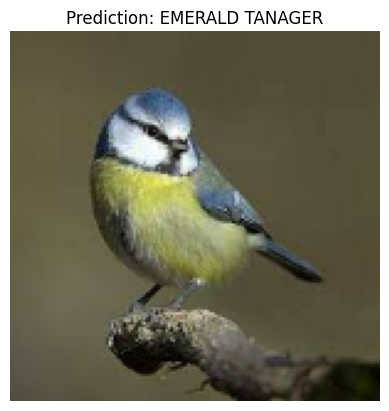

In [30]:
#blaumeise
pred_and_plot(model_p150_e10,blaumeise, class_names)

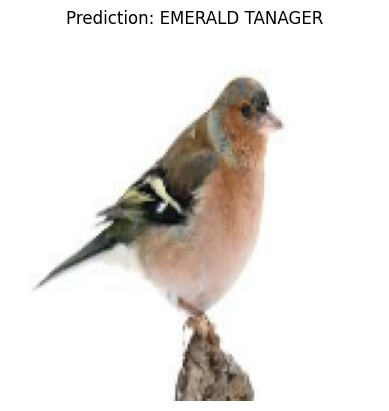

In [31]:
#buchfink
pred_and_plot(model_p150_e10,buchfink, class_names)

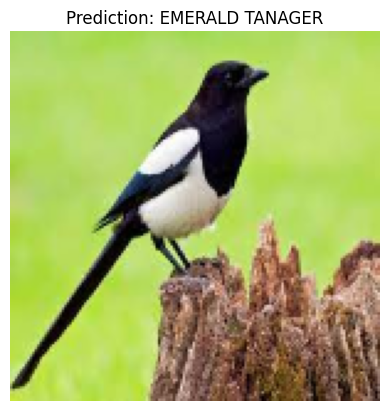

In [32]:
#elster
pred_and_plot(model_p150_e10,elster, class_names)

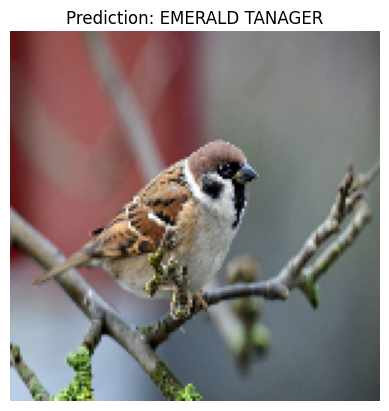

In [33]:
#feldsperling
pred_and_plot(model_p150_e10,feldsperling, class_names)

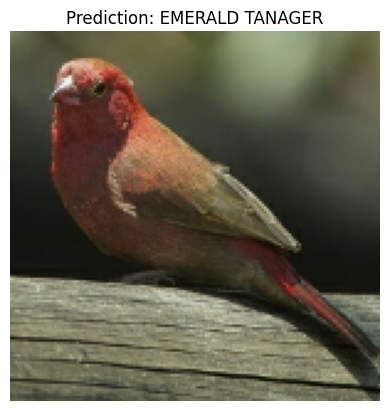

In [34]:
#firefinch
pred_and_plot(model_p150_e10,firefinch, class_names)

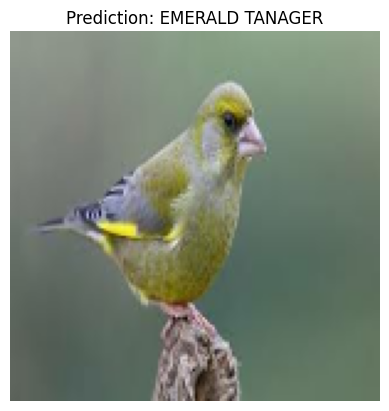

In [35]:
#gruenfink
pred_and_plot(model_p150_e10,gruenfink, class_names)

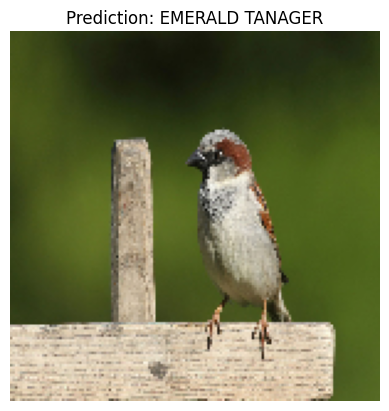

In [36]:
#haussperling
pred_and_plot(model_p150_e10,haussperling, class_names)

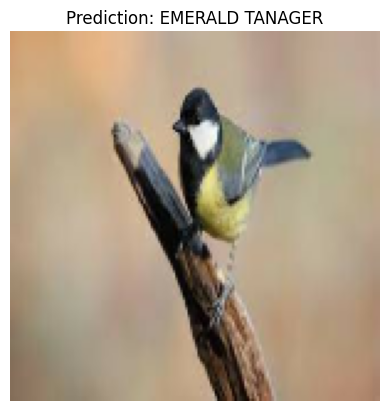

In [37]:
#kohlmeise
pred_and_plot(model_p150_e10,kohlmeise, class_names)

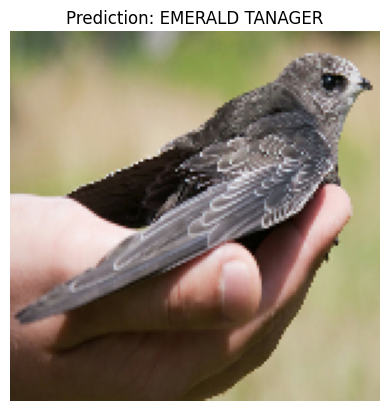

In [38]:
#mauersegler
pred_and_plot(model_p150_e10,mauersegler, class_names)

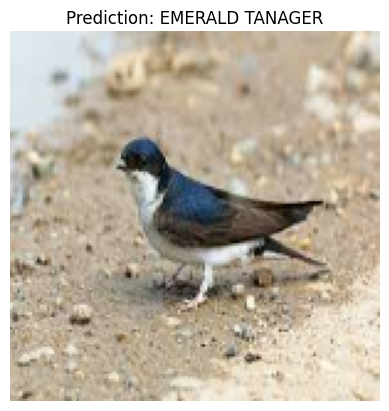

In [39]:
#mehlschwalbe
pred_and_plot(model_p150_e10,mehlschwalbe, class_names)

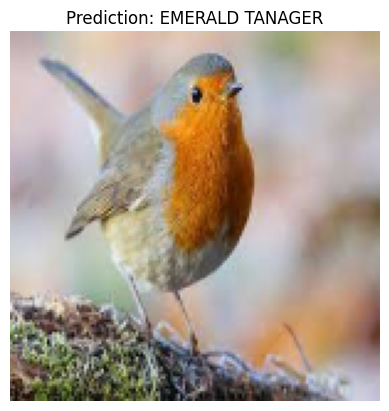

In [40]:
# rotkehlchen
pred_and_plot(model_p150_e10,rotkehlchen, class_names)

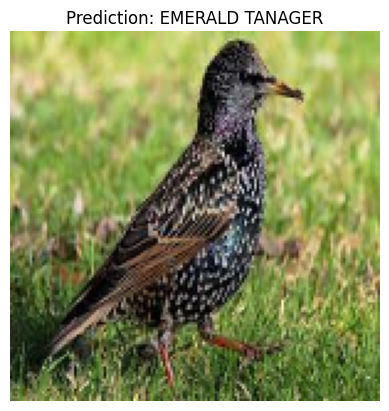

In [41]:
# star
pred_and_plot(model_p150_e10,star, class_names)